# Maximum Likelihood Estimation For the Normal Distribution

In [6]:
import numpy as np
import matplotlib.pyplot as plt

**Probability: p(condition|distribution) where distribution is fixed and condition changes**

**Likelihood: L(distribution|data) where data is fixed and distribution changes**

In [60]:
def gaussian(x,mu,sig):
    return = 1/np.sqrt(2*np.pi*np.power(sig,2.0))*np.exp(-np.power(x-mu,2.0)/(2*np.power(sig,2.0)))

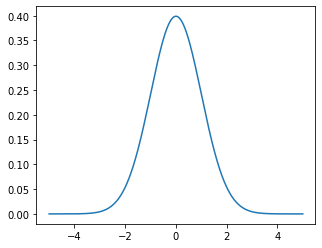

In [68]:
x = np.linspace(-5,5,1000)
y = gaussian(x,0,1)
plt.figure(figsize=(5,4))
plt.plot(x,y,'-')
plt.show()

In [ ]:
# example of likelihood and probability


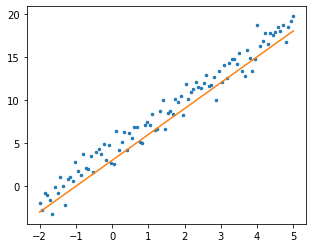

In [113]:
a = 3
b = 4

x = np.linspace(-2,5,100)
y = a*x + b + np.random.normal(size=100)

plt.figure(figsize=(5,4))
plt.plot(x,y,'.',markersize=5)
plt.plot(x,a*x + 3)
plt.show()

In [159]:
# ...
# note: mu is set (must be) zeros because we already know that the noise is gaussian.
#       we could also estimate mu and the estimated value from MLE will be zero.
def log_likelihood(a,b,sig,x,y):
    y_fit = a*x + b
    y_res = y - y_fit
    
    return np.sum(np.log(gaussian(y_res,0,sig)))


In [165]:
l_max = log_likelihood(3,4,0.3,x,y)

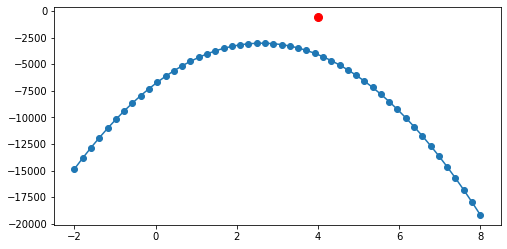

In [185]:
b_vec = np.linspace(-2,8,50)
l_b_vec = np.zeros((50,1))
for i in range(50):
    l_b_vec[i] = log_likelihood(4,b_vec[i],0.3,x,y)

plt.figure(figsize=(8,4))
plt.plot(b_vec,l_b_vec,'-o',)
plt.plot(4,l_max,'ro',markersize=8)
plt.show()